In [1]:
import qiskit
import qiskit_aer
print(qiskit_aer.__version__)
print(qiskit.__version__)

0.15.0
1.1.1


In [3]:
# state = cos(theta/2)|0> + e^(i*phi)*sin(theta/2)|1>
# cos(theta/2) = sqrt(3)/2
# acos(cos(theta/2)) = acos(sqrt(3)/2)
# theta/2 = acos(sqrt(3)/2)
# theta = acos(sqrt(3)/2)*2
# theta = pi/3 = 60 grados


# e^(i*phi) = cos(phi)+i*sin(phi) - La identidad de Euler
# e^(i*phi)*sin(pi/6) = 1/2
# (cos(phi)+i*sin(phi))*sin(pi/6) = 1/2
# (cos(phi)*sin(pi/6) = 1/2
# (cos(phi) = (1/2)/sin(pi/6)
# acos((cos(phi)) = acos((1/2)/sin(pi/6)) = 0 grados


In [3]:
import numpy as np

In [5]:
# Matriz X (compuerta Pauli-X)
x = np.array([[0, 1], 
              [1, 0]])

# Matriz Y (compuerta Pauli-Y)
y = np.array([[0, -1j], 
              [1j, 0]])

# Matriz Z (compuerta Pauli-Z)
z = np.array([[1, 0], 
              [0, -1]])

# Matriz Hadamar
h = 1/np.sqrt(2)*np.array([[1,1],
                           [1,-1]]) 

# Matriz I (compuerta Pauli-Z)
i = np.array([[1, 0], 
              [0, 1]])



print(x)
print(y)
print(z)
print(h)
print(i)

[[0 1]
 [1 0]]
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
[[ 1  0]
 [ 0 -1]]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[[1 0]
 [0 1]]


In [6]:
from qiskit import QuantumCircuit, QuantumRegister
import qiskit.quantum_info
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit,  QuantumRegister
from qiskit.quantum_info import Statevector

theta = np.pi / 2
phi = np.pi / 4

qr = QuantumRegister(1)
qc = QuantumCircuit(qr)

qc.h(0)
#qc.ry(theta, qr[0])
#qc.rz(phi, qr[0])

Statevector.from_instruction(qc)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


    ┌──────────────┐
q2: ┤ U(π/7,π/5,0) ├
    └──────────────┘
Statevector([0.97492791+0.j        , 0.18002322+0.13079452j],
            dims=(2,))


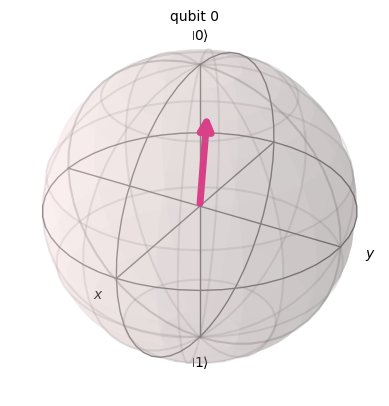

In [7]:
from qiskit import QuantumCircuit, QuantumRegister
import qiskit.quantum_info
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit,  QuantumRegister
from qiskit.quantum_info import Statevector


qr = QuantumRegister(1)
qc = QuantumCircuit(qr)


#qc.h(0)
#print(qc)


qc.u(np.pi/7, np.pi/5, 0, 0)
print(qc)

Statevector.from_instruction(qc)
sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

In [7]:
q0 = np.array([[np.sqrt(3)/2],
               [1/2]])

print(q0)

[[0.8660254]
 [0.5      ]]


In [8]:
# Se multiplica primero la compuerta y despúes el estado
s1 = np.dot(x,q0)
print(s1)

[[0.5      ]
 [0.8660254]]


In [9]:
# [[0.5      ] 
# [0.8660254]]
# cos(theta/2) = 0.5 
# acos(cos(theta/2)) = acos(0.5)
# theta/2 = acos(0.5)
# theta = acos(0.5)*2 = 2.09440

# convertir a grados
print(np.degrees(2.09440)) # = 120 grados

120.0002806121996


In [10]:
s2 = np.dot(y, s1)*(1/1j)
print(s2)

[[-0.8660254-0.j]
 [ 0.5      +0.j]]


In [11]:
# theta/2 = acos(-0.8660254)
# theta/2 = acos(-0.8660254)*2 = 5.235988

# convertir a grados
print(np.degrees(5.235988)) # = 300 grados

300.0000139811449


In [12]:
s3 = np.dot(z, s2)
print(s3)

[[-0.8660254+0.j]
 [-0.5      +0.j]]


In [13]:
# Como el resultado es negativo se puede factorizar el -
s3 = np.dot(z, s2)*-1
print(s3)

[[0.8660254-0.j]
 [0.5      -0.j]]


In [14]:
# theta = acos(0.8660254)*2 = 1.04720

# convertir a grados
print(np.degrees(1.04720)) # = 300 grados

60.0001403060998


In [15]:
s4 = np.dot(h, s3)
print(s4)

[[0.96592583+0.j]
 [0.25881905+0.j]]


Statevector([0.8660254+0.j, 0.5      +0.j],
            dims=(2,))


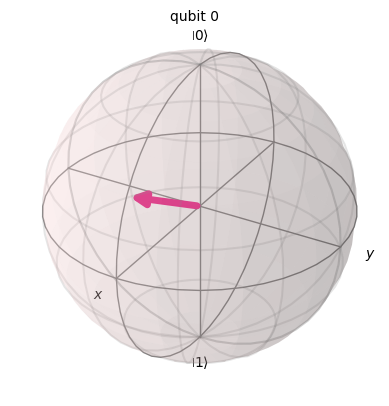

In [16]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
from qiskit.visualization import plot_bloch_multivector
alpha = np.sqrt(3)/2
beta = 1/2
state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(state_vector,0)

# 60 Grados

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

   ┌─────────────────────────┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├
   └─────────────────────────┘└───┘
Statevector([0.5      +0.j, 0.8660254+0.j],
            dims=(2,))


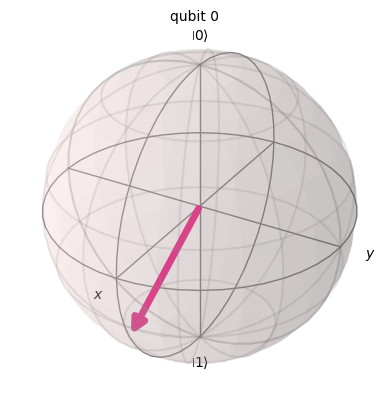

In [17]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
alpha = np.sqrt(3)/2
beta = 1/2
state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(state_vector,0)

# Se multiplica primero la compuerta y despúes el estado
qc.x(0)
print(qc)

# 120 Grados

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

   ┌─────────────────────────┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├
   └─────────────────────────┘└───┘
   ┌─────────────────────────┐┌───┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├┤ Y ├
   └─────────────────────────┘└───┘└───┘
Statevector([0.-0.8660254j, 0.+0.5j      ],
            dims=(2,))


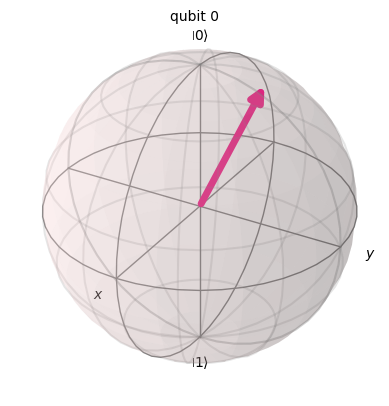

In [18]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
alpha = np.sqrt(3)/2
beta = 1/2
state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(state_vector,0)

# Se multiplica primero la compuerta y despúes el estado
qc.x(0)
print(qc)

qc.y(0)
print(qc)

# 300 Grados

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

   ┌─────────────────────────┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├
   └─────────────────────────┘└───┘
   ┌─────────────────────────┐┌───┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├┤ Y ├
   └─────────────────────────┘└───┘└───┘
   ┌─────────────────────────┐┌───┐┌───┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├┤ Y ├┤ Z ├
   └─────────────────────────┘└───┘└───┘└───┘
Statevector([0.-0.8660254j, 0.-0.5j      ],
            dims=(2,))


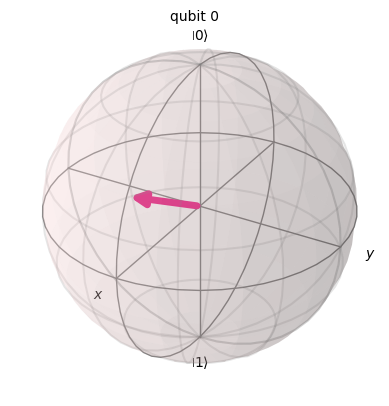

In [19]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
alpha = np.sqrt(3)/2
beta = 1/2
state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(state_vector,0)

# Se multiplica primero la compuerta y despúes el estado
qc.x(0)
print(qc)

qc.y(0)
print(qc)

qc.z(0)
print(qc)

# 60 Grados (Estado original)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

   ┌─────────────────────────┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├
   └─────────────────────────┘└───┘
   ┌─────────────────────────┐┌───┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├┤ Y ├
   └─────────────────────────┘└───┘└───┘
   ┌─────────────────────────┐┌───┐┌───┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├┤ Y ├┤ Z ├
   └─────────────────────────┘└───┘└───┘└───┘
   ┌─────────────────────────┐┌───┐┌───┐┌───┐┌───┐
q: ┤ Initialize(0.86603,0.5) ├┤ X ├┤ Y ├┤ Z ├┤ H ├
   └─────────────────────────┘└───┘└───┘└───┘└───┘
Statevector([0.-0.96592583j, 0.-0.25881905j],
            dims=(2,))


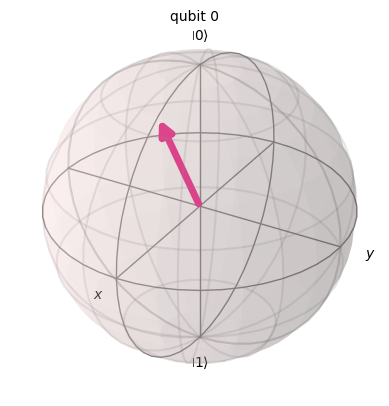

In [20]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
alpha = np.sqrt(3)/2
beta = 1/2
state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(state_vector,0)

# Se multiplica primero la compuerta y despúes el estado
qc.x(0)
print(qc)

qc.y(0)
print(qc)

qc.z(0)
print(qc)

qc.h(0)
print(qc)

# 30 Grados

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

Taller de ChatGPT

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


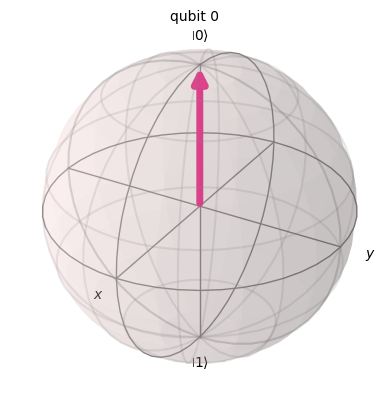

In [21]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
qc = QuantumCircuit(1)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


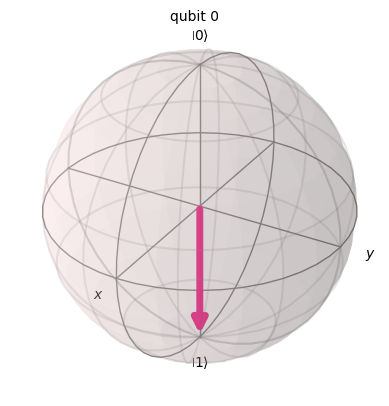

In [22]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
qc = QuantumCircuit(1)

qc.x(0)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

Statevector([0.-1.j, 0.+0.j],
            dims=(2,))


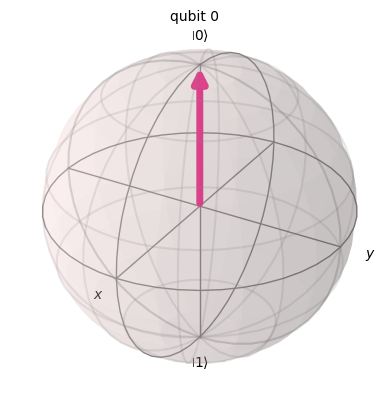

In [23]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
qc = QuantumCircuit(1)

qc.x(0)
qc.y(0)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

Statevector([0.-1.j, 0.+0.j],
            dims=(2,))


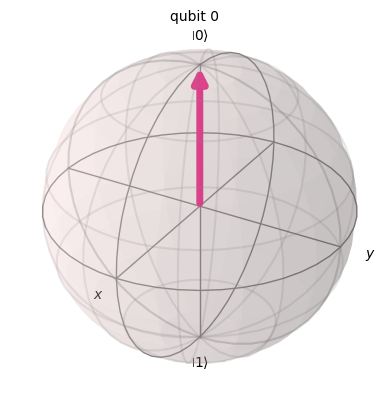

In [24]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
qc = QuantumCircuit(1)

qc.x(0)
qc.y(0)
qc.z(0)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

Statevector([0.-0.70710678j, 0.-0.70710678j],
            dims=(2,))


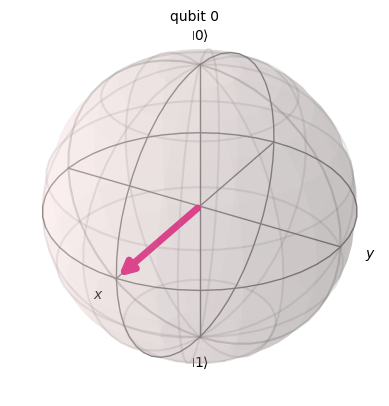

In [25]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
qc = QuantumCircuit(1)

qc.x(0)
qc.y(0)
qc.z(0)
qc.h(0)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

[[0.8660254]
 [0.5      ]]
0.7499999999999999
0.25


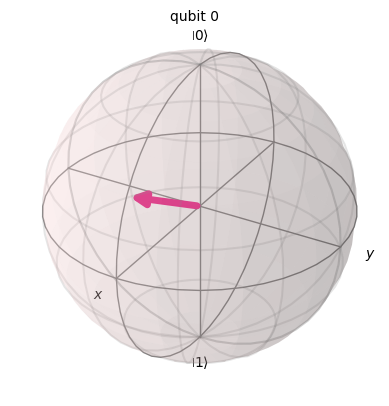

In [26]:
# state = cos(theta/2)|0> + e^(i*phi)*sin(theta/2)|1>
# cos(theta/2) = sqrt(3)/2
# e^(i*phi)*sin(theta/2) = 1/2

q0 = np.array([[np.sqrt(3)/2],
               [1/2]])

alfa = np.absolute((np.sqrt(3)/2)**2)
beta = np.absolute((1/2)**2)
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])
vectorAlfa = np.array([np.sqrt(3)/2, np.sqrt(3)/2])

print(q0)
print(alfa)
print(beta)




alpha = np.sqrt(3)/2
beta = 1/2
state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(state_vector,0)

# 60 Grados

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
#print(sv)
plot_bloch_multivector(sv)

[[0.70710678]
 [0.70710678]]
0.4999999999999999
2.0000000000000004
[0.70710678]
[0.5]


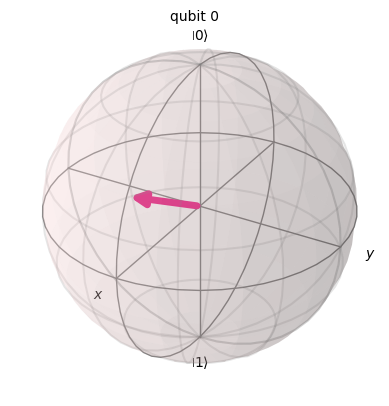

In [27]:
# state = cos(theta/2)|0> + e^(i*phi)*sin(theta/2)|1>
# cos(theta/2) = sqrt(3)/2
# e^(i*phi)*sin(theta/2) = 1/2

q0 = np.array([[1/np.sqrt(2)],
               [1/np.sqrt(2)]])

alfa = np.absolute((1/np.sqrt(2))**2)
beta = np.absolute((np.sqrt(2))**2)
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])
vectorAlfa = np.array([np.sqrt(3)/2, np.sqrt(3)/2])

print(q0)
print(alfa)
print(beta)

primerPaso = np.dot(ket0, q0)
print(primerPaso)

segundoPaso = np.absolute((primerPaso)**2)
print(segundoPaso)



alpha = np.sqrt(3)/2
beta = 1/2
state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(state_vector,0)

# 60 Grados

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
#print(sv)
plot_bloch_multivector(sv)

In [ ]:
beta = np.absolute((np.sqrt(2))**2)
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])
vectorAlfa = np.array([np.sqrt(3)/2, np.sqrt(3)/2])

print(q0)
print(alfa)
print(beta)

primerPaso = np.dot(ket0, q0)
print(primerPaso)

segundoPaso = np.absolute((primerPaso)**2)
print(segundoPaso)



alpha = np.sqrt(3)/2
beta = 1/2
state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(state_vector,0)

# 60 Grados

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
#print(sv)
plot_bloch_multivector(sv)

In [28]:
# state = cos(theta/2)|0> + e^(i*phi)*sin(theta/2)|1>
# cos(theta/2) = sqrt(3)/2
# e^(i*phi)*sin(theta/2) = 1/2

q0 = np.array([[np.sqrt(3)/2],
               [1/2]])

alfa = np.absolute((np.sqrt(3)/2)**2)
beta = np.absolute((1/2)**2)
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])
vectorAlfa = np.array([np.sqrt(3)/2, np.sqrt(3)/2])

print(q0)
print(alfa)
print(beta)

primerPaso = np.dot(ket0, q0)
print(primerPaso)

segundoPaso = np.absolute((primerPaso)**2)
print(segundoPaso)

[[0.8660254]
 [0.5      ]]
0.7499999999999999
0.25
[0.8660254]
[0.75]


In [1]:
# state = cos(theta/2)|0> + e^(i*phi)*sin(theta/2)|1>
# cos(theta/2) = sqrt(3)/2
# e^(i*phi)*sin(theta/2) = 1/2

q0 = np.array([[0.8],
               [0.6]])

alfa = np.absolute((np.sqrt(3)/2)**2)
beta = np.absolute((1/2)**2)
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

primerPaso = np.dot(ket1, q0)
print(primerPaso)

print("Probabilidad")
segundoPaso = np.absolute((primerPaso)**2)
print(segundoPaso)

NameError: name 'np' is not defined

   ┌───────────────┐┌───┐
q: ┤ Initialize(0) ├┤ X ├
   └───────────────┘└───┘
   ┌───────────────┐┌───┐┌───┐
q: ┤ Initialize(0) ├┤ X ├┤ Z ├
   └───────────────┘└───┘└───┘
Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


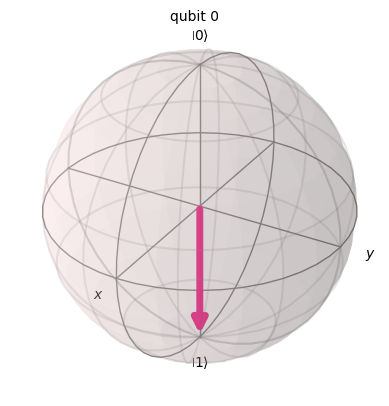

In [30]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
#alpha = np.sqrt(3)/2
#beta = 1/2
#state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(0)

# Se multiplica primero la compuerta y despúes el estado
qc.x(0)
print(qc)

#qc.y(0)
#print(qc)

qc.z(0)
print(qc)

#qc.h(0)
#print(qc)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

In [31]:
multiplicacion = np.dot(x,h)
print(multiplicacion)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [32]:
multiplicacion = np.dot(h,x)
print(multiplicacion)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


   ┌───────────────┐┌───┐
q: ┤ Initialize(0) ├┤ Z ├
   └───────────────┘└───┘
   ┌───────────────┐┌───┐┌───┐
q: ┤ Initialize(0) ├┤ Z ├┤ X ├
   └───────────────┘└───┘└───┘
   ┌───────────────┐┌───┐┌───┐┌───┐
q: ┤ Initialize(0) ├┤ Z ├┤ X ├┤ Z ├
   └───────────────┘└───┘└───┘└───┘
   ┌───────────────┐┌───┐┌───┐┌───┐┌───┐
q: ┤ Initialize(0) ├┤ Z ├┤ X ├┤ Z ├┤ H ├
   └───────────────┘└───┘└───┘└───┘└───┘
Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))


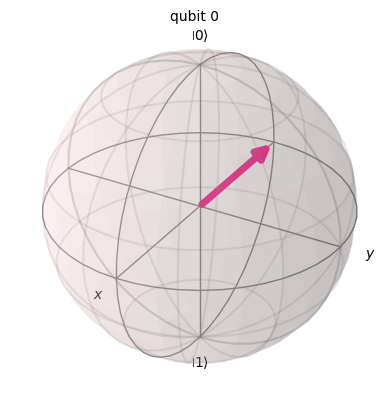

In [33]:
from qiskit import QuantumCircuit
import qiskit.quantum_info
#alpha = np.sqrt(3)/2
#beta = 1/2
#state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(0)

qc.z(0)
print(qc)

qc.x(0)
print(qc)

qc.z(0)
print(qc)

qc.h(0)
print(qc)

#qc.y(0)
#print(qc)


sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

   ┌───────────────┐┌───┐
q: ┤ Initialize(0) ├┤ H ├
   └───────────────┘└───┘
   ┌───────────────┐┌───┐┌───┐
q: ┤ Initialize(0) ├┤ H ├┤ T ├
   └───────────────┘└───┘└───┘
Statevector([0.70710678+0.j , 0.5       +0.5j],
            dims=(2,))


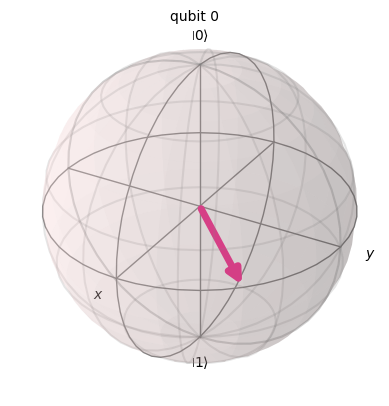

In [34]:
#alpha = np.sqrt(3)/2
#beta = 1/2
#state_vector = [alpha, beta]
qc = QuantumCircuit(1)
qc.initialize(0)

# Se multiplica primero la compuerta y despúes el estado
# qc.x(0)
# print(qc)

#qc.y(0)
#print(qc)

#qc.z(0)
#print(qc)

#qc.s(0)
#print(qc)

#qc.t(0)
#print(qc)

qc.h(0)
print(qc)

qc.t(0)
print(qc)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

In [35]:
# state = cos(theta/2)|0> + e^(i*phi)*sin(theta/2)|1>
# cos(theta/2) = sqrt(3)/2
# e^(i*phi)*sin(theta/2) = 1/2

q0 = np.array([[np.sqrt(3)/2],
               [1/2]])

alfa = np.absolute((np.sqrt(3)/2)**2)
beta = np.absolute((1/2)**2)
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

primerPaso = np.dot(ket0, q0)
print(primerPaso)

print("Probabilidad")
segundoPaso = np.absolute((primerPaso)**2)
print(segundoPaso)

[0.8660254]
Probabilidad
[0.75]


In [36]:
respuesta = np.dot(x,z)
print(respuesta)

qc = QuantumCircuit(1)
qc.initialize(0)

qc.x(0)
#print(qc)

qc.z(0)
print(qc)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)


[[ 0 -1]
 [ 1  0]]
   ┌───────────────┐┌───┐┌───┐
q: ┤ Initialize(0) ├┤ X ├┤ Z ├
   └───────────────┘└───┘└───┘
Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


In [37]:
respuesta = np.dot(z,x)
print(respuesta)

[[ 0  1]
 [-1  0]]


In [38]:
respuesta = np.dot(x,h)
print(respuesta)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [39]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram

respuesta = np.dot(h,x)
print(respuesta)

qc = QuantumCircuit(1)
qc.initialize(0)

qc.h(0)
#print(qc)

qc.x(0)
print(qc)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)


[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
   ┌───────────────┐┌───┐┌───┐
q: ┤ Initialize(0) ├┤ H ├┤ X ├
   └───────────────┘└───┘└───┘
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


   ┌───────────────┐┌───┐
q: ┤ Initialize(0) ├┤ H ├
   └───────────────┘└───┘
   ┌───────────────┐┌───┐┌───┐
q: ┤ Initialize(0) ├┤ H ├┤ S ├
   └───────────────┘└───┘└───┘


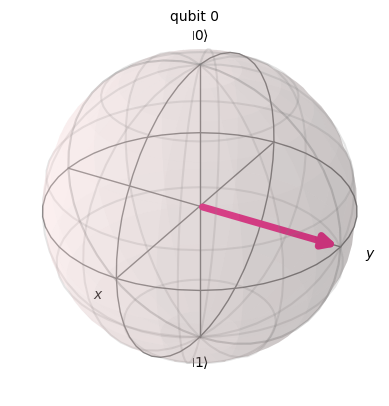

In [40]:
qc = QuantumCircuit(1)
qc.initialize(0)

qc.h(0)
print(qc)

qc.s(0)
print(qc)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
# print(sv)
plot_bloch_multivector(sv)

   ┌───────────────┐┌───┐
q: ┤ Initialize(1) ├┤ Z ├
   └───────────────┘└───┘
Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


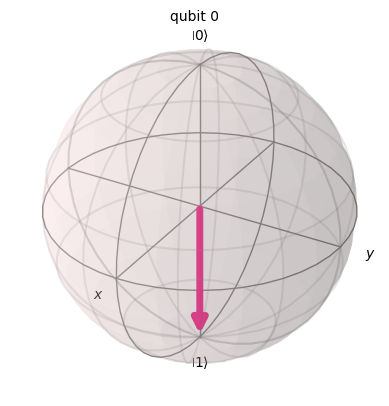

In [46]:
qc = QuantumCircuit(1)
qc.initialize(1)

qc.z(0)
print(qc)

sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

In [8]:

qc = QuantumCircuit(32)

for i in range(32):
    qc.h(i)

display(qc.draw())

┌───┐
 q_0: ┤ H ├
      ├───┤
 q_1: ┤ H ├
      ├───┤
 q_2: ┤ H ├
      ├───┤
 q_3: ┤ H ├
      ├───┤
 q_4: ┤ H ├
      ├───┤
 q_5: ┤ H ├
      ├───┤
 q_6: ┤ H ├
      ├───┤
 q_7: ┤ H ├
      ├───┤
 q_8: ┤ H ├
      ├───┤
 q_9: ┤ H ├
      ├───┤
q_10: ┤ H ├
      ├───┤
q_11: ┤ H ├
      ├───┤
q_12: ┤ H ├
      ├───┤
q_13: ┤ H ├
      ├───┤
q_14: ┤ H ├
      ├───┤
q_15: ┤ H ├
      ├───┤
q_16: ┤ H ├
      ├───┤
q_17: ┤ H ├
      ├───┤
q_18: ┤ H ├
      ├───┤
q_19: ┤ H ├
      ├───┤
q_20: ┤ H ├
      ├───┤
q_21: ┤ H ├
      ├───┤
q_22: ┤ H ├
      ├───┤
q_23: ┤ H ├
      ├───┤
q_24: ┤ H ├
      ├───┤
q_25: ┤ H ├
      ├───┤
q_26: ┤ H ├
      ├───┤
q_27: ┤ H ├
      ├───┤
q_28: ┤ H ├
      ├───┤
q_29: ┤ H ├
      ├───┤
q_30: ┤ H ├
      ├───┤
q_31: ┤ H ├
      └───┘

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/3) 
q_1: ┤ X ├─■───────
     └───┘

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.70710678+0.j        , 0.35355339+0.61237244j],
            dims=(2, 2))


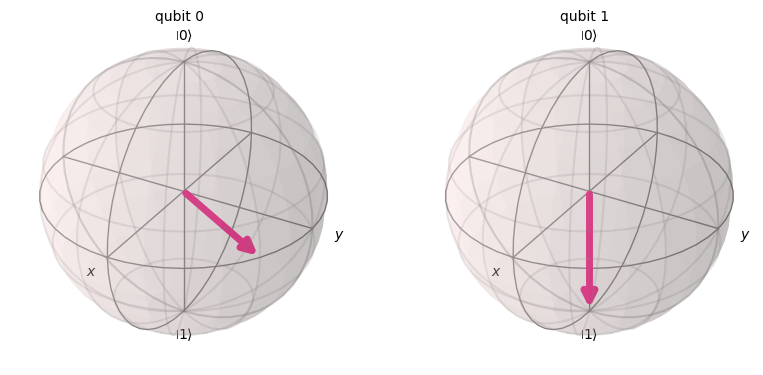

In [32]:
qc = QuantumCircuit(2)
qc.h(0) # Rotar en theta
qc.x(1)

qc.cp(np.pi/3, 0, 1)
display(qc.draw())
sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

qc.cp(np.pi/3, 0, 1)
display(qc.draw())
sv = qiskit.quantum_info.Statevector.from_instruction(qc)
print(sv)
plot_bloch_multivector(sv)